<a href="https://colab.research.google.com/github/AlvaroUriel/idal_ia3/blob/main/tfm_v0_3_011122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from  google.colab import drive
 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
#Imports
from tensorflow import keras
import matplotlib.pyplot as plt; 
import matplotlib.patches as patches
from tensorflow.keras.utils import load_img
import xml.etree.ElementTree as ET

# Keras
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
from keras.models import Sequential
from keras.applications import imagenet_utils
from tensorflow.keras.utils import load_img, img_to_array
from keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory

import cv2
from google.colab.patches import cv2_imshow

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; 
import matplotlib.image as img
from numpy.core.fromnumeric import argmax

##Data analysis

In [3]:
test_img_path = '/content/drive/MyDrive/IA3/TFM/archive/images/BikesHelmets0.png'
test_dat_path = '/content/drive/MyDrive/IA3/TFM/archive/annotations/BikesHelmets0.xml'

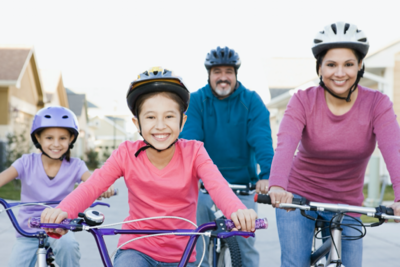

In [4]:
#image = load_img(test_img_path)
#plt.imshow(image) 

cv2_imshow(cv2.imread(test_img_path))

In [5]:
xml_file = open(test_dat_path)
print(xml_file.read())


<annotation>
    <folder>images</folder>
    <filename>BikesHelmets0.png</filename>
    <size>
        <width>400</width>
        <height>267</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>With Helmet</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>29</xmin>
            <ymin>105</ymin>
            <xmax>82</xmax>
            <ymax>160</ymax>
        </bndbox>
    </object>
    <object>
        <name>With Helmet</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>122</xmin>
            <ymin>66</ymin>
            <xmax>193</xmax>
            <ymax>154</ymax>
        </bndbox>
    </object>
    <object>
        <name>With Helmet</name>
        <pose>Unspecified</pose>
        <truncated>0</tr

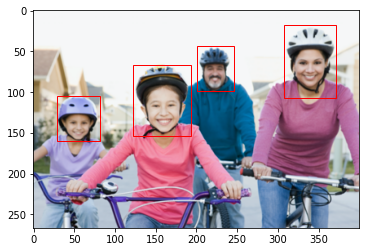

In [6]:
# Create figure and axes
fig, ax = plt.subplots()

# Display the image
image = load_img(test_img_path)
ax.imshow(image)

tree=ET.parse(test_dat_path)

for element in tree.findall('object'):

    xmin = int(element.find("bndbox").find('xmin').text)
    ymin = int(element.find("bndbox").find('ymin').text)
    xmax = int(element.find("bndbox").find('xmax').text)
    ymax = int(element.find("bndbox").find('ymax').text)

    h = ymax - ymin
    w = xmax - xmin

    # Create a Rectangle patch
    rect = patches.Rectangle((int(xmin), int(ymin)), int(w), int(h), linewidth=1, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

plt.show()

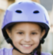

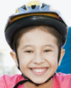

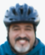

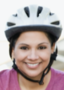

In [7]:
#Example of cropped bounding boxes
tree=ET.parse(test_dat_path)

# Create figure and axes
img = cv2.imread(test_img_path)

for element in tree.findall('object'):

    xmin = int(element.find("bndbox").find('xmin').text)
    ymin = int(element.find("bndbox").find('ymin').text)
    xmax = int(element.find("bndbox").find('xmax').text)
    ymax = int(element.find("bndbox").find('ymax').text)

    h = ymax - ymin
    w = xmax - xmin

    # Cropping an image
    cropped_image = img[ymin:ymax, xmin:xmax, ]
    
    # Display cropped image
    cv2_imshow(cropped_image)

    plt.show()

##Data preprocessing

In [8]:
bCropImages = 0
if(bCropImages):

  img_path      = '/content/drive/MyDrive/IA3/TFM/archive/images/'
  xml_path      = '/content/drive/MyDrive/IA3/TFM/archive/annotations/'
  img_crop_path = '/content/drive/MyDrive/IA3/TFM/archive/croppedImages0/'
  cont=[0,0]
  cont_element = 0

  contenido = os.listdir(img_path)

  for fichero in contenido:
    if fichero.endswith('.png'):
      
      img = cv2.imread(img_path+fichero)
      tree=ET.parse(xml_path+fichero[:-3]+'xml')

      cont_element = 0

      for element in tree.findall('object'):

        clase = int(np.invert('Without' in element.find("name").text))
        xmin = int(element.find("bndbox").find('xmin').text)
        ymin = int(element.find("bndbox").find('ymin').text)
        xmax = int(element.find("bndbox").find('xmax').text)
        ymax = int(element.find("bndbox").find('ymax').text)

        h = ymax - ymin
        w = xmax - xmin

        # Cropping an image
        cropped_image = img[ymin:ymax, xmin:xmax]

        if cropped_image.shape[0]==0 and cropped_image.shape[1]==0:
          print(fichero + ' object: ' + str(cont_element) + ' is empty!')
        else:
          cv2.imwrite(img_crop_path + str(clase) + '_' + str(cont[clase]) + '_' + fichero[:-4] + '.png', cropped_image)
          cont[clase] = cont[clase] + 1
        
        cont_element = cont_element +1



In [12]:
#Visual correction of labels

wrong_label_images =['BikesHelmets78.',
                     'BikesHelmets601.',
                     'BikesHelmets573.',
                     'BikesHelmets517.',
                     'BikesHelmets424.',
                     'BikesHelmets411.',
                     'BikesHelmets375.',
                     'BikesHelmets291.',
                     'BikesHelmets276.',
                     'BikesHelmets154.',
                     'BikesHelmets752.',
                     'BikesHelmets186.',
                     'BikesHelmets182.',
                     'BikesHelmets462.',
                     'BikesHelmets45.',
                     'BikesHelmets354.',
                     'BikesHelmets296.',
                     'BikesHelmets214.',
                     'BikesHelmets281.',
                     'BikesHelmets446.']
wrong_label_images

['BikesHelmets78.',
 'BikesHelmets601.',
 'BikesHelmets573.',
 'BikesHelmets517.',
 'BikesHelmets424.',
 'BikesHelmets411.',
 'BikesHelmets375.',
 'BikesHelmets291.',
 'BikesHelmets276.',
 'BikesHelmets154.',
 'BikesHelmets752.',
 'BikesHelmets186.',
 'BikesHelmets182.',
 'BikesHelmets462.',
 'BikesHelmets45.',
 'BikesHelmets354.',
 'BikesHelmets296.',
 'BikesHelmets214.',
 'BikesHelmets281.',
 'BikesHelmets446.']

In [19]:
bCropImages = 1
if(bCropImages):

  img_path      = '/content/drive/MyDrive/IA3/TFM/archive/images/'
  xml_path      = '/content/drive/MyDrive/IA3/TFM/archive/annotations/'
  img_crop_path = '/content/drive/MyDrive/IA3/TFM/archive/croppedImages1/'
  cont=[0,0]
  cont_element = 0

  contenido = os.listdir(img_path)

  for fichero in contenido:
    
    if fichero[:-3] in wrong_label_images:
      print('Omitida:' + fichero) 
    else:
      if fichero.endswith('.png'):
        
        img = cv2.imread(img_path+fichero)
        tree=ET.parse(xml_path+fichero[:-3]+'xml')

        cont_element = 0

        for element in tree.findall('object'):

          clase = int(np.invert('Without' in element.find("name").text))
          xmin = int(element.find("bndbox").find('xmin').text)
          ymin = int(element.find("bndbox").find('ymin').text)
          xmax = int(element.find("bndbox").find('xmax').text)
          ymax = int(element.find("bndbox").find('ymax').text)

          h = ymax - ymin
          w = xmax - xmin

          # Cropping an image
          cropped_image = img[ymin:ymax, xmin:xmax]

          if cropped_image.shape[0]==0 and cropped_image.shape[1]==0:
            print(fichero + ' object: ' + str(cont_element) + ' is empty!')
          else:
#           cv2.imwrite(img_crop_path + str(clase) + '_' + str(cont[clase]) + '_' + fichero[:-4] + '.png', cropped_image)
            cv2.imwrite(img_crop_path + str(clase) + '__' + str(cont[clase]) + '_' + fichero[:-4] + '.png', cropped_image)
            cont[clase] = cont[clase] + 1
          
          cont_element = cont_element +1

BikesHelmets103.png object: 0 is empty!
BikesHelmets140.png object: 0 is empty!
Omitida:BikesHelmets154.png
Omitida:BikesHelmets182.png
Omitida:BikesHelmets186.png
Omitida:BikesHelmets214.png
BikesHelmets205.png object: 0 is empty!
BikesHelmets279.png object: 0 is empty!
Omitida:BikesHelmets296.png
Omitida:BikesHelmets276.png
Omitida:BikesHelmets291.png
Omitida:BikesHelmets281.png
BikesHelmets343.png object: 0 is empty!
Omitida:BikesHelmets354.png
BikesHelmets326.png object: 0 is empty!
Omitida:BikesHelmets375.png
Omitida:BikesHelmets411.png
Omitida:BikesHelmets424.png
BikesHelmets441.png object: 0 is empty!
BikesHelmets444.png object: 0 is empty!
Omitida:BikesHelmets45.png
Omitida:BikesHelmets446.png
Omitida:BikesHelmets462.png
BikesHelmets530.png object: 0 is empty!
Omitida:BikesHelmets517.png
Omitida:BikesHelmets573.png
Omitida:BikesHelmets601.png
BikesHelmets616.png object: 2 is empty!
BikesHelmets671.png object: 1 is empty!
BikesHelmets706.png object: 1 is empty!
Omitida:BikesHelm

In [21]:
data_path = '/content/drive/MyDrive/IA3/TFM/archive/croppedImages1/'

#Creamos listas con todos los nombres de los ficheros 
data_0=[]
data_1=[]

for img in os.listdir(data_path):
  if '0__' in img:
    data_0.append(os.path.join(data_path,img))
  else:
    data_1.append(os.path.join(data_path,img))

print(len(os.listdir(data_path)), len(data_0), len(data_1), len(data_0) + len(data_1))

1391 470 921 1391


In [23]:
from sklearn.model_selection import train_test_split

train_0, test_0 = train_test_split(data_0, test_size=0.4)
test_0, val_0 = train_test_split(test_0, test_size=0.5)

print(len(data_0), len(train_0), len(test_0), len(val_0))

train_1, test_1 = train_test_split(data_1, test_size=0.4)
test_1, val_1 = train_test_split(test_1, test_size=0.5)

print(len(data_1), len(train_1), len(test_1), len(val_1))

470 282 94 94
921 552 184 185


In [24]:
train_0[0:3]

['/content/drive/MyDrive/IA3/TFM/archive/croppedImages1/0__67_BikesHelmets232.png',
 '/content/drive/MyDrive/IA3/TFM/archive/croppedImages1/0__263_BikesHelmets540.png',
 '/content/drive/MyDrive/IA3/TFM/archive/croppedImages1/0__11_BikesHelmets137.png']

In [25]:
train_1[0:3]

['/content/drive/MyDrive/IA3/TFM/archive/croppedImages1/1__510_BikesHelmets461.png',
 '/content/drive/MyDrive/IA3/TFM/archive/croppedImages1/1__395_BikesHelmets377.png',
 '/content/drive/MyDrive/IA3/TFM/archive/croppedImages1/1__826_BikesHelmets703.png']

In [26]:
num_classes = 2
y = []

for img in train_0:
  y.append(0) 

y_train_0 = np_utils.to_categorical(y, num_classes)

In [27]:
y = []

for img in train_1:
  y.append(1) 

y_train_1 = np_utils.to_categorical(y, num_classes)

In [28]:
y = []

for img in test_0:
  y.append(0) 

y_test_0 = np_utils.to_categorical(y, num_classes)

In [29]:
y = []

for img in test_1:
  y.append(1) 

y_test_1 = np_utils.to_categorical(y, num_classes)

In [30]:
y = []

for img in val_0:
  y.append(0) 

y_val_0 = np_utils.to_categorical(y, num_classes)

In [31]:
y = []

for img in val_1:
  y.append(1) 

y_val_1 = np_utils.to_categorical(y, num_classes)

In [32]:
y_train = np.concatenate([y_train_0, y_train_1])
y_test = np.concatenate([y_test_0, y_test_1])
y_val = np.concatenate([y_val_0, y_val_1])
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(834, 2)
(278, 2)
(279, 2)


In [33]:
train = train_0 + train_1
test = test_0 + test_1
val = val_0 + val_1
print(len(train))
print(len(test))
print(len(val))


834
278
279


In [34]:
#Clase para mostrar imagenes
def show_imgs(X):
    plt.figure(figsize=(8, 8))
    #k = 0
    k= np.random.randint(0, len(X)-1-16)

    for i in range(0,4):
        for j in range(0,4):
            image = load_img(train[k], target_size=(224, 224))
            ax = plt.subplot2grid((4,4),(i,j))
            ax.set_title('Clase: ' + str(y_train[k]) )     
            plt.imshow(image)            
            k = k+1
    #Muestra
    plt.show()

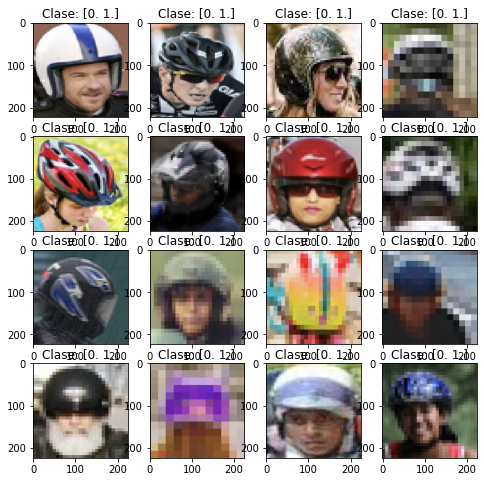

In [35]:
show_imgs(train)


In [36]:
def create_features(dataset):
 
    x_scratch = []

    k=0

    #Bucle sobre las imagenes
    for imagePath in dataset:
 
        #Se cargan las imagenes a tamaño 224
        image = load_img(imagePath, target_size=(224, 224))
        image = img_to_array(image)
 
        # preprocess the image by (1) expanding the dimensions and
        # (2) subtracting the mean RGB pixel intensity from the
        # ImageNet dataset
        image = np.expand_dims(image, axis=0)
        image = imagenet_utils.preprocess_input(image)
 
        # add the image to the batch
        x_scratch.append(image)

        k = k+1
        print('convertida:', k, ' de ', len(dataset))
 
    x = np.vstack(x_scratch)
    return x

In [37]:
train_x = create_features(train)
val_x = create_features(val)
test_x = create_features(test)
print(train_x.shape)
print(val_x.shape)
print(test_x.shape)

convertida: 1  de  834
convertida: 2  de  834
convertida: 3  de  834
convertida: 4  de  834
convertida: 5  de  834
convertida: 6  de  834
convertida: 7  de  834
convertida: 8  de  834
convertida: 9  de  834
convertida: 10  de  834
convertida: 11  de  834
convertida: 12  de  834
convertida: 13  de  834
convertida: 14  de  834
convertida: 15  de  834
convertida: 16  de  834
convertida: 17  de  834
convertida: 18  de  834
convertida: 19  de  834
convertida: 20  de  834
convertida: 21  de  834
convertida: 22  de  834
convertida: 23  de  834
convertida: 24  de  834
convertida: 25  de  834
convertida: 26  de  834
convertida: 27  de  834
convertida: 28  de  834
convertida: 29  de  834
convertida: 30  de  834
convertida: 31  de  834
convertida: 32  de  834
convertida: 33  de  834
convertida: 34  de  834
convertida: 35  de  834
convertida: 36  de  834
convertida: 37  de  834
convertida: 38  de  834
convertida: 39  de  834
convertida: 40  de  834
convertida: 41  de  834
convertida: 42  de  834
c

In [38]:
# Creating a checkpointer
checkpointer = ModelCheckpoint(filepath='scratchmodel.best.hdf5',
                               verbose=1,save_best_only=True)
# load the VGG16 network
print("[INFO loading network...")
model_vgg = VGG16(weights="imagenet", include_top=False, input_shape=train_x.shape[1:])
model_vgg.summary()

[INFO loading network...
58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                     

In [39]:
model_transfer_full = Sequential()
model_transfer_full.add(model_vgg)
model_transfer_full.add(GlobalAveragePooling2D())
model_transfer_full.add(Dropout(0.2))
model_transfer_full.add(Dense(100, activation='relu'))
model_transfer_full.add(Dense(num_classes, activation='softmax'))
model_transfer_full.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 100)               51300     
                                                                 
 dense_1 (Dense)             (None, 2)                 202       
                                                                 
Total params: 14,766,190
Trainable params: 14,766,190
Non-trainable params: 0
____________________________________________

In [40]:
opt = Adam(learning_rate=0.00001)
model_transfer_full.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
history = model_transfer_full.fit(train_x, y_train, batch_size=32, epochs=10,
          validation_data=(val_x, y_val), callbacks=[checkpointer],verbose=1, shuffle=True)

Epoch 1/10
27/27 [==============================] - ETA: 0s - loss: 0.7665 - accuracy: 0.6463
Epoch 1: val_loss improved from inf to 0.57311, saving model to scratchmodel.best.hdf5
27/27 [==============================] - 34s 606ms/step - loss: 0.7665 - accuracy: 0.6463 - val_loss: 0.5731 - val_accuracy: 0.7204
Epoch 2/10
27/27 [==============================] - ETA: 0s - loss: 0.5159 - accuracy: 0.7374
Epoch 2: val_loss improved from 0.57311 to 0.47557, saving model to scratchmodel.best.hdf5
27/27 [==============================] - 12s 461ms/step - loss: 0.5159 - accuracy: 0.7374 - val_loss: 0.4756 - val_accuracy: 0.7957
Epoch 3/10
27/27 [==============================] - ETA: 0s - loss: 0.4976 - accuracy: 0.7506
Epoch 3: val_loss did not improve from 0.47557
27/27 [==============================] - 12s 443ms/step - loss: 0.4976 - accuracy: 0.7506 - val_loss: 0.4763 - val_accuracy: 0.7993
Epoch 4/10
26/27 [===========================>..] - ETA: 0s - loss: 0.3690 - accuracy: 0.8317
Epo

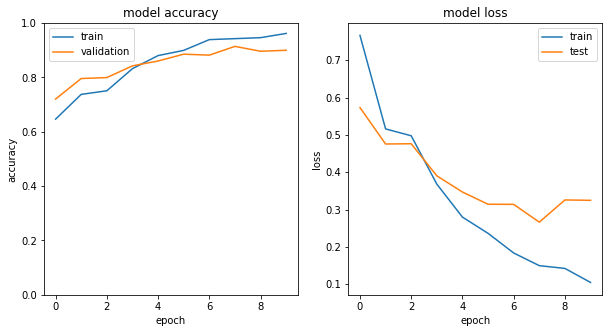

In [41]:
def plot_accuracy_loss(history):
    fig = plt.figure(figsize=(10,5))
 
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.ylim([0, 1])
 
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
 
plot_accuracy_loss(history)

In [42]:
test_y=[]

for i in y_test:
  test_y.append(np.argmax(i))

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score
preds = np.argmax(model_transfer_full.predict(test_x), axis=1)
print("\nAccuracy on Test Data: ", accuracy_score(test_y, preds))
print("\nNumber of correctly identified imgaes: ",
      accuracy_score(test_y, preds, normalize=False),"\n")
confusion_matrix(test_y, preds, labels=range(0,num_classes))

9/9 [==============================] - 3s 410ms/step

Accuracy on Test Data:  0.9100719424460432

Number of correctly identified imgaes:  253 



array([[ 74,  20],
       [  5, 179]])

Ground truth:  0   Without helmet
1/1 [==============================] - 0s 17ms/step
Predict:       0   Without helmet


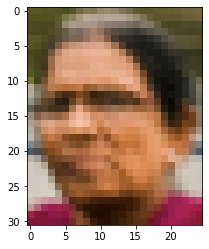

In [81]:
import matplotlib.image as img

classes_names = ('Without helmet','With helmet')

id=np.random.randint(0, len(val)-1)

image = img.imread(val[id])

plt.imshow(image[:,:,:], cmap='gray', vmin = 0, vmax = 255,interpolation='none')
print("Ground truth: ", y_val[id].argmax(), " ", classes_names[y_val[id].argmax()])
#plt.imshow(train_x[id])

p = model_transfer_full.predict(np.expand_dims(val_x[id], axis=0))
print("Predict:      ", p.argmax(), " ", classes_names[p.argmax()])